# Linear Regression - Ecommerce data analysis

The dataset is accessed as a part of Jose Portilla's udemy course. The dataset is about an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the Data
We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.

In [2]:
customers = pd.read_csv("Ecommerce Customers")

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# Exploratory Data Analysis  - Data Visualization

In [6]:
sns.set_style('whitegrid')

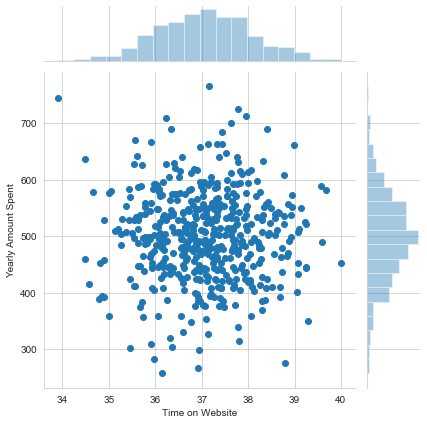

In [8]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers)

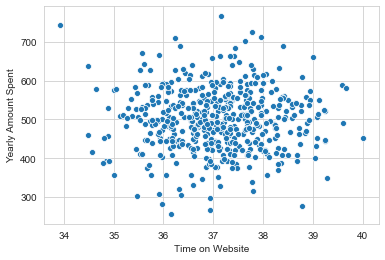

In [13]:
sns.scatterplot(x='Time on Website', y='Yearly Amount Spent', data=customers)


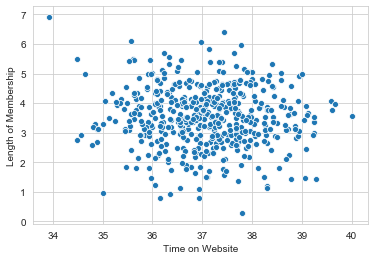

In [12]:
sns.scatterplot(x='Time on Website', y='Length of Membership', data=customers)

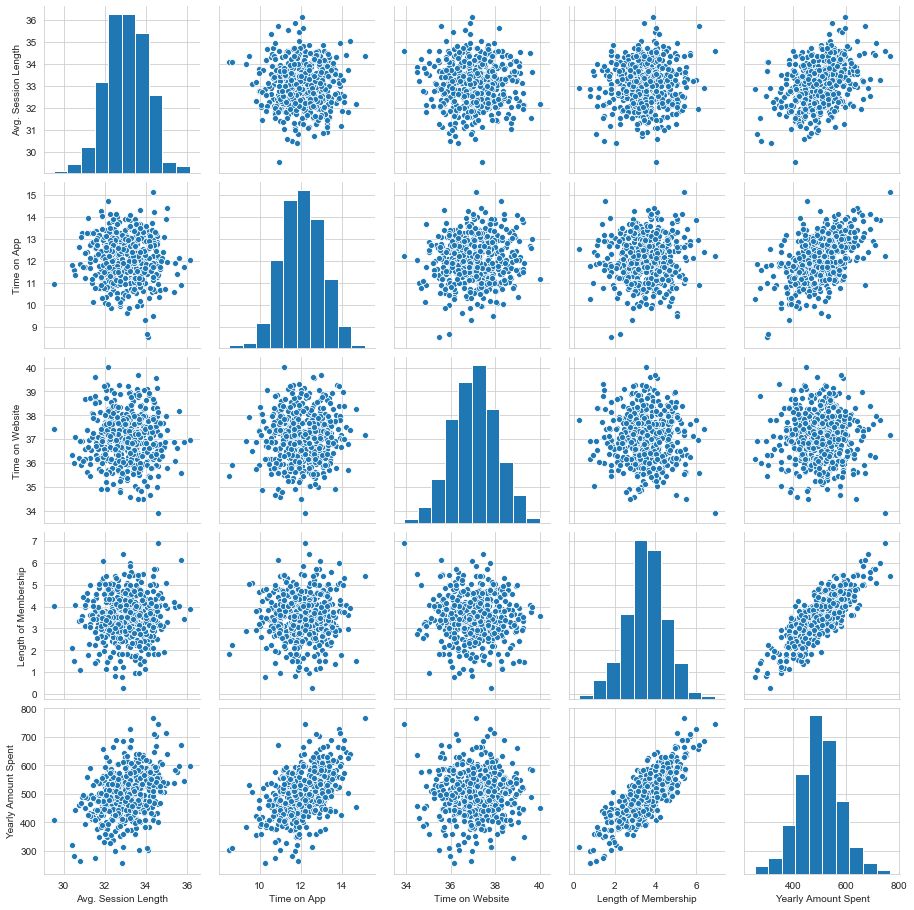

In [14]:
sns.pairplot(customers)

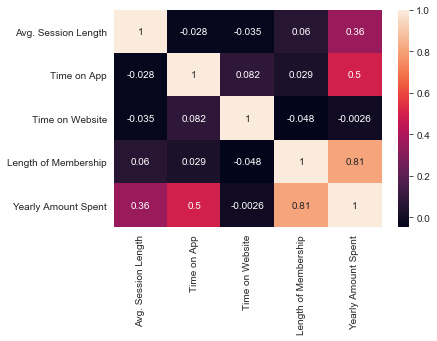

In [15]:
sns.heatmap(customers.corr(), annot=True)

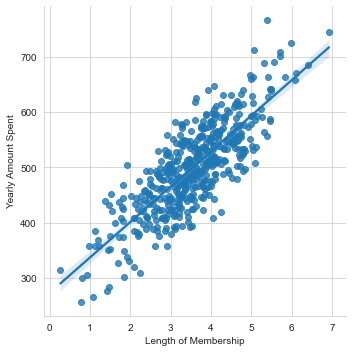

In [16]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

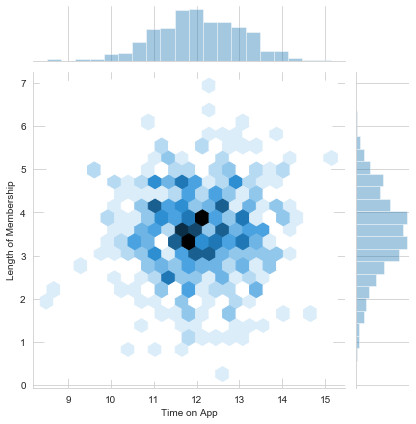

In [17]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

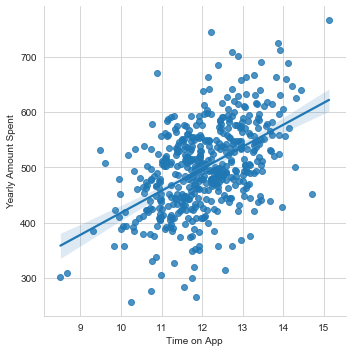

In [24]:
sns.lmplot(x='Time on App', y='Yearly Amount Spent',data=customers )

# Training and Testing Data

In [19]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [22]:
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent'] 

In [23]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

# Training the model

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
lr.coef_

array([25.69154034, 37.89259966,  0.56058149, 61.64859402])

In [38]:
coeffs = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
print(coeffs)

                      Coefficient
Avg. Session Length     25.691540
Time on App             37.892600
Time on Website          0.560581
Length of Membership    61.648594


# Making Predictions

In [39]:
predictions = lr.predict(X_test)

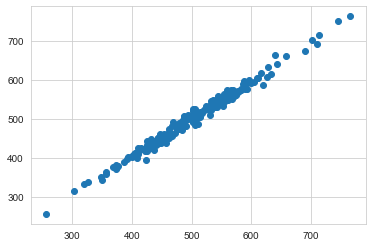

In [40]:
plt.scatter(y_test,predictions)

In [44]:
from sklearn import metrics
print ('MSE:',metrics.mean_squared_error(y_test, predictions))

MSE: 93.83297800820107


In [45]:
from sklearn.metrics import r2_score

In [46]:
r2_score(y_test,predictions)

0.9855061240024658

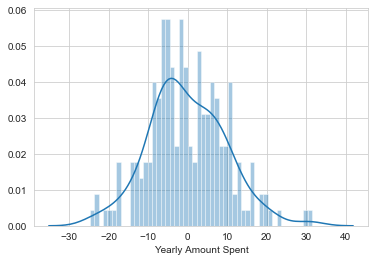

In [47]:
sns.distplot((y_test-predictions),bins=50)

In [51]:
coeffs = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
print(coeffs)

                      Coefficient
Avg. Session Length     25.691540
Time on App             37.892600
Time on Website          0.560581
Length of Membership    61.648594
